# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
from collections import defaultdict

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import naive_bayes

#Graphviz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every student.
`gender` | The gender of the student. Values are ‘M’ and ‘F’.
`region` | The region the student is from. For example, South East Region, Wales, etc.
`highest_qualification` | The highest qualification of the student. For example, 'Post Graduate Qualification', 'HE Qualification', etc.
`city_score` | The score assigned to each city based on income. A city with low score is more deprived. (0-100%)
`age` | The age of the student (in years).
`disability` | It indicates if the student suffers from a disability. Values are ‘Y’ and ‘N’.
`studied_credits` | The credits accumulated by the student. College students usually have more credits then high-school students.
`prelim_score` | The score attained by the student in the preliminary examination.
`online_clicks` | The number of clicks performed by the student online while surfing through the course-related information.
`full_term_subscription` | It indicates if the student enrolled for full-term subscription. Values are 0 (no), 1 (yes).

## Data Wrangling & Visualization

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [ ]:
data.head()

,id,gender,region,highest_qualification,city_score,age,studied_credits,disability,prelim_score,online_clicks,full_term_subscription
0,537811,F,East Midlands Region,A Level or Equivalent,50-60%,0-35,60,Y,97.071429,25159,1
1,35355,M,Wales,Lower Than A Level,0-10%,35-55,30,N,75.222222,3358,0
2,308703,F,Wales,HE Qualification,50-60%,0-35,60,N,82.750000,319,0
3,2213424,F,Scotland,HE Qualification,30-40%,35-55,60,N,85.909091,1071,1
4,486087,M,Yorkshire Region,A Level or Equivalent,0-10%,0-35,120,N,85.416667,2533,1


In [ ]:
#Explore columns
data.columns

Index(['id', 'gender', 'region', 'highest_qualification', 'city_score', 'age',
       'studied_credits', 'disability', 'prelim_score', 'online_clicks',
       'full_term_subscription'],
      dtype='object')

In [ ]:
#Description
data.describe()

,id,studied_credits,prelim_score,online_clicks,full_term_subscription
count,2.450000e+03,2450.000000,2446.000000,2450.000000,2450.000000
mean,7.400272e+05,78.355102,77.885134,1963.303673,0.518776
std,5.776365e+05,40.031740,17.592143,2433.041181,0.499749
min,2.421300e+04,30.000000,0.000000,3.000000,0.000000
25%,5.238912e+05,60.000000,69.000000,444.000000,0.000000
50%,5.993920e+05,60.000000,84.267857,1069.000000,1.000000
75%,6.525535e+05,120.000000,90.200000,2550.750000,1.000000
max,2.690062e+06,355.000000,100.000000,25159.000000,1.000000


In [ ]:
# check missing values
missing = data.isnull().sum()
missing[missing > 0]

city_score      106
prelim_score      4
dtype: int64

In [ ]:
#Filling the columns with null values
data.city_score.fillna(value='N/A',inplace=True)
data.prelim_score.fillna(value=0.0,inplace=True)

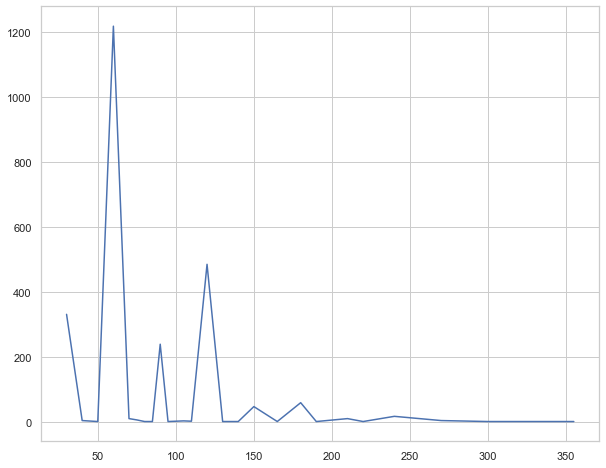

In [ ]:
#Distibution of frequency of students vs studied_credits
plt.figure(figsize=(10,8))
plt.plot(data['studied_credits'].value_counts().sort_index())

The frequency for the  Student credits is highest for the 50%

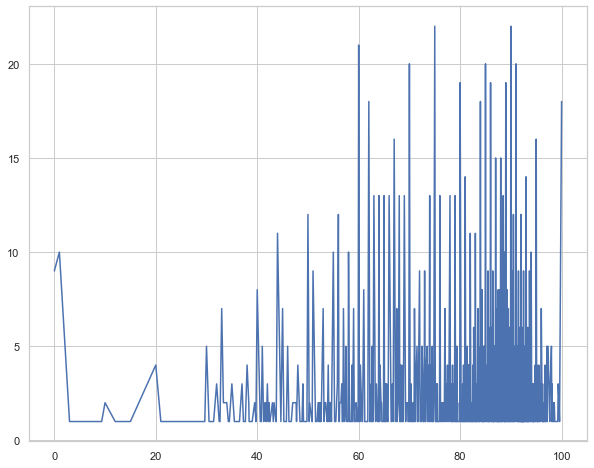

In [ ]:
#Distibution of frequency of students vs prelim_score
plt.figure(figsize=(10,8))
plt.plot(data['prelim_score'].value_counts().sort_index())

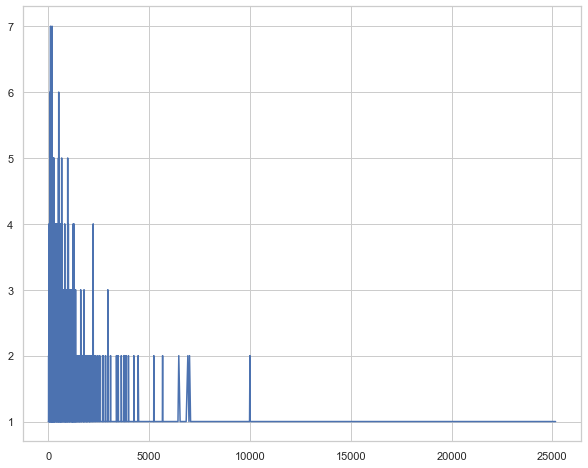

In [ ]:
#Distibution of frequency of students vs online clicks
plt.figure(figsize=(10,8))
plt.plot(data['online_clicks'].value_counts().sort_index())

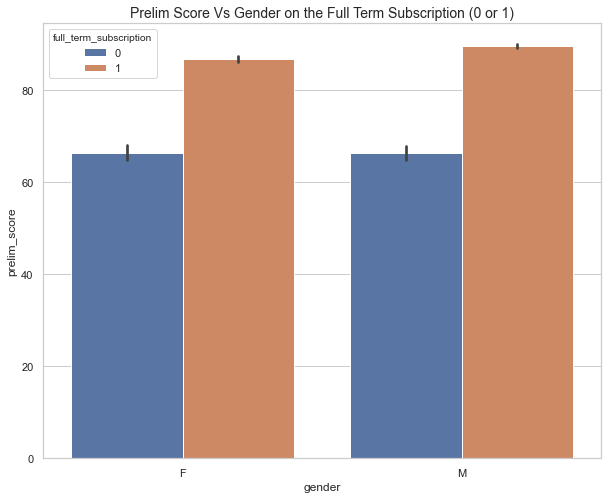

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Prelim Score Vs Gender on the Full Term Subscription (0 or 1)",fontsize = 14)
sns.barplot(y ="prelim_score", 
            x ="gender", data=data, hue='full_term_subscription')

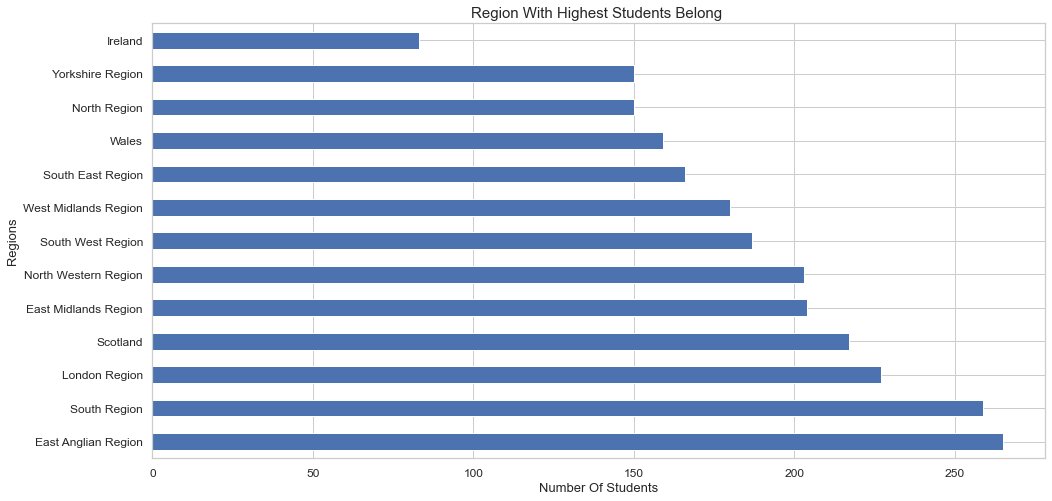

In [ ]:
data['region'].value_counts().plot(kind= 'barh',figsize = (16,8),fontsize=12)

#setup the title and the labels of the plot.
plt.title("Region With Highest Students Belong ",fontsize=15)
plt.xlabel('Number Of Students',fontsize=13)
plt.ylabel("Regions",fontsize= 13)
sns.set_style("whitegrid")

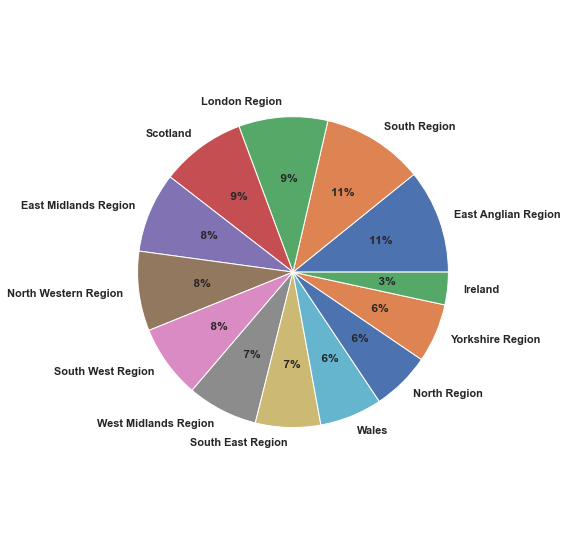

In [ ]:
i = 0
region_count = []
for region in data['region'].value_counts().index:
    region_count.append([region, data['region'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
region_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*region_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in region_count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

11% students belong to East Anglian Region or South Region.

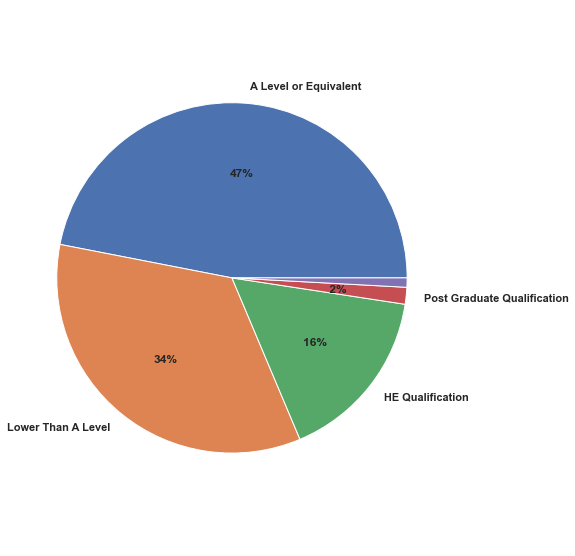

In [ ]:
i = 0
count = []
for col in data['highest_qualification'].value_counts().index:
    count.append([col, data['highest_qualification'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

47% students have done A Level or Equivalent 

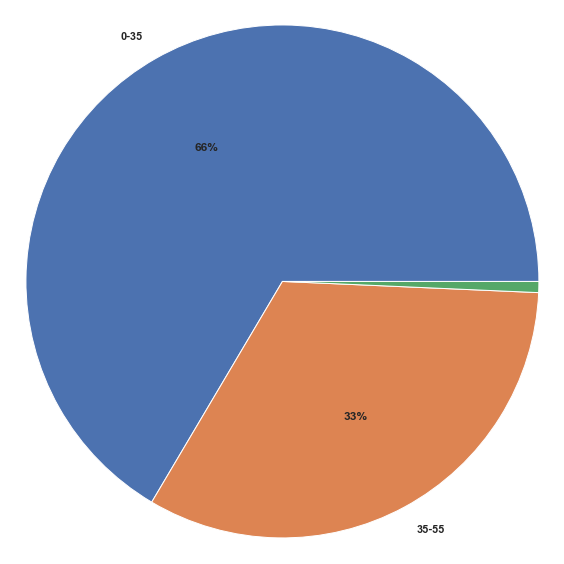

In [ ]:
i = 0
count = []
for col in data['age'].value_counts().index:
    count.append([col, data['age'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

66% people lie in 0-35 years of age category.

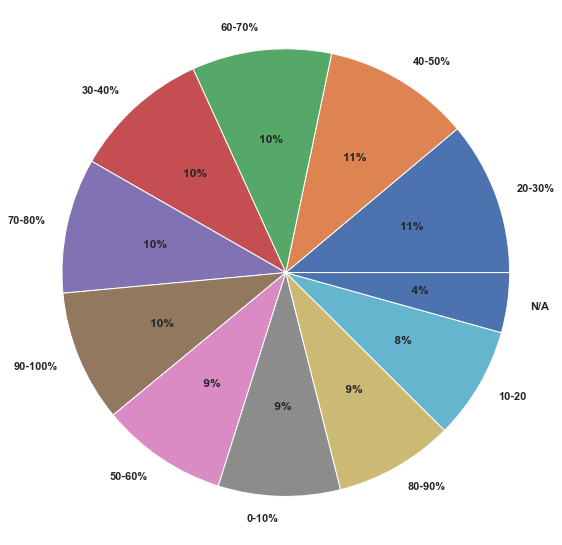

In [ ]:
i = 0
count = []
for col in data['city_score'].value_counts().index:
    count.append([col, data['city_score'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

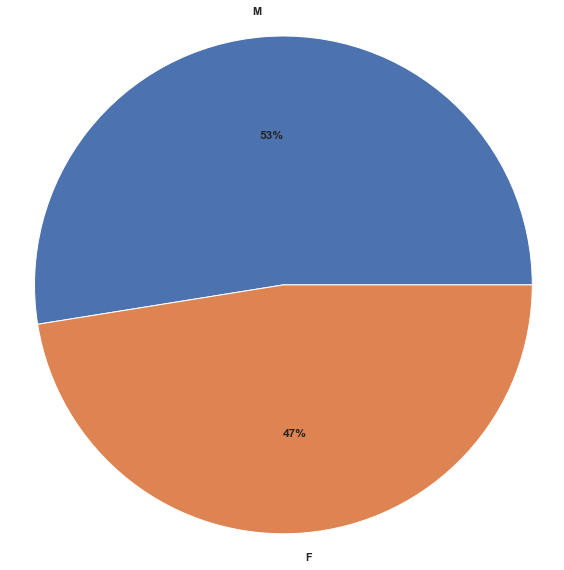

In [ ]:
i = 0
count = []
for col in data['gender'].value_counts().index:
    count.append([col, data['gender'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

53% are Male Students and 47% are female Students.

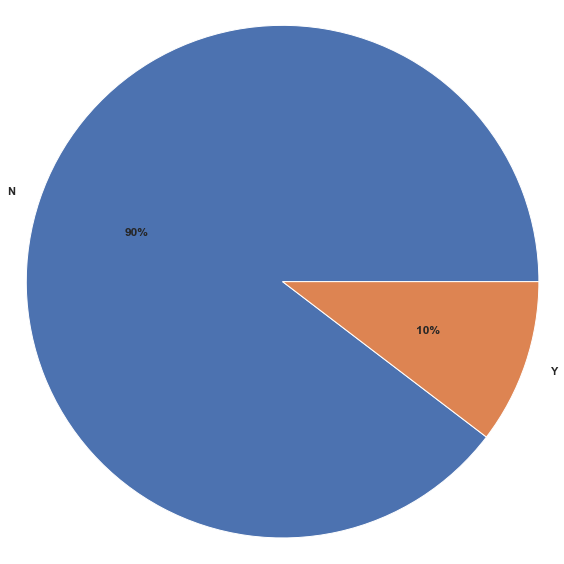

In [ ]:
i = 0
count = []
for col in data['disability'].value_counts().index:
    count.append([col, data['disability'].value_counts()[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(8, 8))
count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in count]
ax.pie(sizes, labels=labels_selected,autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

10% students are disable.

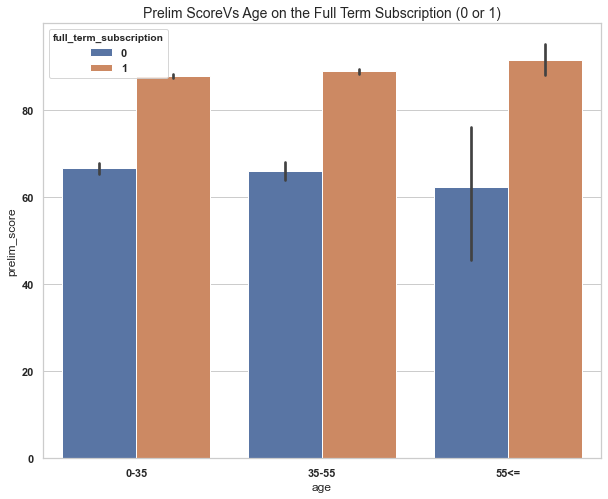

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Prelim ScoreVs Age on the Full Term Subscription (0 or 1)",fontsize = 14)
sns.barplot(y ="prelim_score", x ="age", data=data, hue='full_term_subscription')

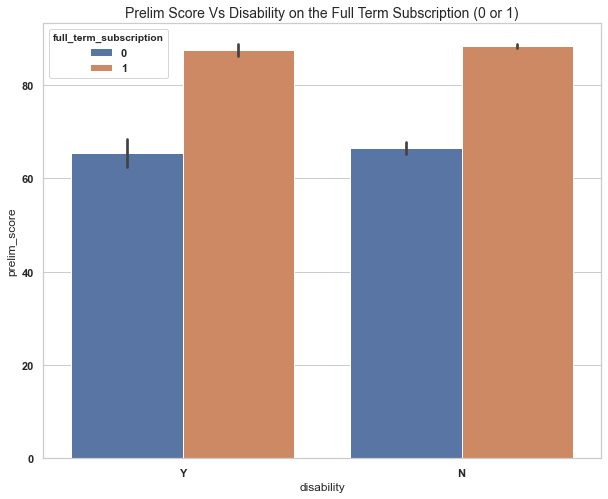

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Prelim Score Vs Disability on the Full Term Subscription (0 or 1)",fontsize = 14)
sns.barplot(y ="prelim_score", x ="disability", data=data, hue='full_term_subscription')

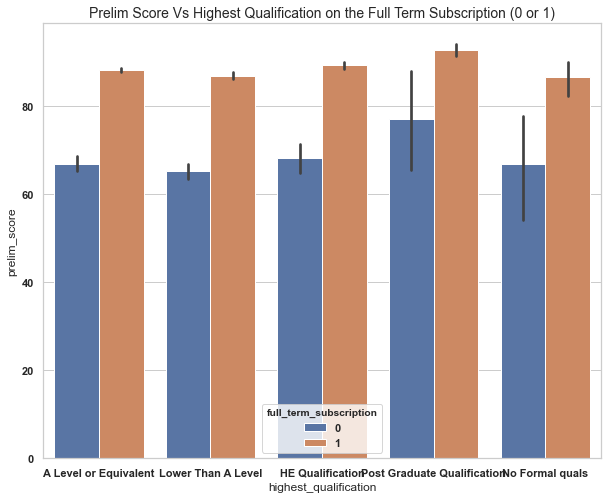

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Prelim Score Vs Highest Qualification on the Full Term Subscription (0 or 1)",fontsize = 14)
sns.barplot(y ="prelim_score", x ="highest_qualification", data=data, hue='full_term_subscription')

In [ ]:
# feature correlation
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .7 }, ax=ax, annot = True,
                    annot_kws = { 'fontsize' : 10 })

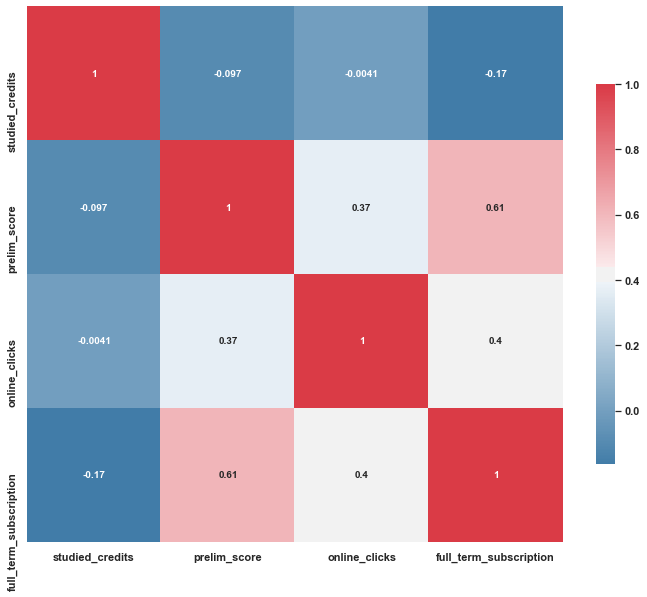

In [ ]:
plot_correlation_map(data[['studied_credits',
           'prelim_score','online_clicks',
           'full_term_subscription']])

## Visualization, Modeling, Machine Learning

Build a model that can predict the students that will subscribe for the full-term course and identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,gender,region,highest_qualification,city_score,age,studied_credits,disability,prelim_score,online_clicks
0,600094,M,North Western Region,A Level or Equivalent,70-80%,0-35,90,N,63.1,569
1,615165,F,Wales,A Level or Equivalent,40-50%,0-35,180,Y,76.0,454
2,580525,M,North Region,HE Qualification,NaN,0-35,60,N,82.0,1113
3,600579,F,South East Region,Lower Than A Level,20-30%,0-35,60,N,69.5,43
4,2688422,F,South Region,A Level or Equivalent,60-70%,0-35,120,Y,72.0,368


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 11 columns):
id                        2450 non-null int64
gender                    2450 non-null object
region                    2450 non-null object
highest_qualification     2450 non-null object
city_score                2450 non-null object
age                       2450 non-null object
studied_credits           2450 non-null int64
disability                2450 non-null object
prelim_score              2450 non-null float64
online_clicks             2450 non-null int64
full_term_subscription    2450 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 210.7+ KB


In [ ]:
# Get the numerical and categorical variables 
numvars = ['id','studied_credits',
           'prelim_score','online_clicks',
           'full_term_subscription'
          ]
catvars = ['gender','region','highest_qualification',
           'city_score','age','disability']


In [ ]:
print('Percent of the class for full_term_subscription \n' )
print((data.full_term_subscription.value_counts()*100)/len(data))

Percent of the class for full_term_subscription 

1    51.877551
0    48.122449
Name: full_term_subscription, dtype: float64


In [ ]:
#Encoding categorical features
# Labelencoding to transform categorical to numerical
d = defaultdict(LabelEncoder)

# Encoding the variable
train_lecatdata = data[catvars].apply(lambda x: d[x.name].fit_transform(x))

# print transformations
for x in range(len(catvars)):
    print(catvars[x],": ", data[catvars[x]].unique())
    print(catvars[x],": ", train_lecatdata[catvars[x]].unique())

gender :  ['F' 'M']
gender :  [0 1]
region :  ['East Midlands Region' 'Wales' 'Scotland' 'Yorkshire Region'
 'London Region' 'South West Region' 'East Anglian Region' 'Ireland'
 'West Midlands Region' 'North Western Region' 'North Region'
 'South East Region' 'South Region']
region :  [ 1 10  6 12  3  9  0  2 11  5  4  7  8]
highest_qualification :  ['A Level or Equivalent' 'Lower Than A Level' 'HE Qualification'
 'Post Graduate Qualification' 'No Formal quals']
highest_qualification :  [0 2 1 4 3]
city_score :  ['50-60%' '0-10%' '30-40%' '40-50%' '80-90%' '70-80%' 'N/A' '10-20'
 '20-30%' '60-70%' '90-100%']
city_score :  [ 5  0  3  4  8  7 10  1  2  6  9]
age :  ['0-35' '35-55' '55<=']
age :  [0 1 2]
disability :  ['Y' 'N']
disability :  [1 0]


In [ ]:
#Concat transformed datasets
# append the dummy variable of the initial numerical variables numvars
train = pd.concat([data[numvars], train_lecatdata], axis = 1)

In [ ]:
# Set the title as index
train.set_index("id", inplace = True)

#Get the X and y for the data
X = train.drop('full_term_subscription', axis=1)
y = train['full_term_subscription']

# split into training and valid data set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20)
print(X_train.shape,X_valid.shape)

(1960, 9) (490, 9)


### Models

In [ ]:
algos = [
         "RandomForestClassifier",
         "Decision Tree",
         "Logistic Regression",
         "K Nearest Neighbor",
         "Naive Bayes"
        ]
clfs = [RandomForestClassifier(),
        DecisionTreeClassifier(),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=2),
        naive_bayes.GaussianNB()
       ]
         
result = []

for clff in clfs:
    clff.fit(X_train,y_train)
    acc = clff.score(X_valid,y_valid)
    result.append(acc)
result_df = pd.DataFrame(result,index=algos)
result_df.columns=["Accuracy"]
result_df.sort_values(by="Accuracy",ascending=False)

/Users/apple/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Accuracy
RandomForestClassifier,0.877551
Naive Bayes,0.826531
Decision Tree,0.822449
Logistic Regression,0.755102
K Nearest Neighbor,0.724490


Random Forest performs best with the accuarcy of 86.32%

In [ ]:
print('Total number of feature:{}'.format(len(train.columns)))

Total number of feature:10




**Tell the management what features are most important in the model.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


### Random Forest using Grid Search CV

In [ ]:
#Grid Search Cross Validation to get the best 
#parameter for the best estimator i.e. Random Forest 
param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
            }

#define the GridSearch
CV_rnd_cfl = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          scoring = 'roc_auc', verbose = 10, n_jobs = -1)
# fit the model
CV_rnd_cfl.fit(X, y)

best_parameters = CV_rnd_cfl.best_params_

print("The best parameters: ", best_parameters)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

The best parameters:  {'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
#From the  Grid Search CV get the best Random Forest parameters 
clf_r = RandomForestClassifier(max_features= best_parameters['max_features'], 
                             min_samples_leaf = best_parameters['min_samples_leaf'],
                              min_samples_split=best_parameters['min_samples_split'],
                              n_estimators = best_parameters['n_estimators'])
# fit the model
clf_r.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Feature Importance

Text(0.5, 0, 'Feature names')

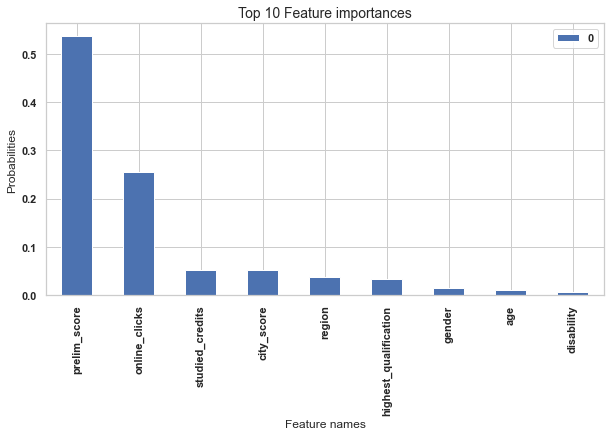

In [ ]:
# Get the feature importance from the Random Forest
feature_imp = pd.DataFrame(clf_r.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False).plot(kind='bar',align="center")
plt.title("Top 10 Feature importances",fontsize = 14)
plt.ylabel('Probabilities',fontsize = 12)
plt.xlabel('Feature names',fontsize = 12)

In [ ]:
feature_imp.sort_values(by = 0 , ascending = False)

,0
prelim_score,0.536462
online_clicks,0.255813
studied_credits,0.052926
city_score,0.051493
region,0.037461
highest_qualification,0.032523
gender,0.015749
age,0.010236
disability,0.007336


> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `full_term_subscription` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **full_term_subscription**

In [ ]:
#fillna the test columns
test_data.city_score.fillna(value='N/A',inplace=True)
test_data.prelim_score.fillna(value=0.0,inplace=True)

#Label encoding for the test data
test_lecatdata = test_data[catvars].apply(lambda x: d[x.name].transform(x))
test = pd.concat([test_data[numvars[:-1]], test_lecatdata], axis = 1)
#set the title
test.set_index('id',inplace=True)

In [ ]:
# Predict the test data
predict = clf_r.predict(test)
test['full_term_subscription'] = predict

In [ ]:
submission_df = test.reset_index()[['id','full_term_subscription']]

In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---